# Tester: Linear SDE's

A Linear SDE for a $n$-dimensional system is of the form
    $$ dX_t = AX_tdt + \sigma dW_t $$
where $W_t$ is a $m$-dimensional Wiener process.

In [2]:
using PyPlot
using Random

# Get software to generate model
include("../LinearSDE/modgen_LSDE.jl")

# Get model reduction software being tested
include("../../Tools/Model_Reduction_Dev.jl")

# Get tester tools
include("testertools.jl")

causal_test (generic function with 1 method)

In [3]:
# Model run Parameters
t_start = 0
t_stop  = 1e3
h       = 1e-2

A       = reshape([-0.5],1,1)
σ       = reshape([1],1,1)
Xo      = [1]
t_disc  = 100
gap     = 1

# Get full model run
Random.seed!(2014)
X = modgen_LSDE(t_start,t_stop,h;
    A, σ, Xo, t_disc, gap)

1×90001 Array{Float64,2}:
 -0.613524  -0.534909  -0.475822  …  -0.823833  -0.786908  -0.842031

In [4]:
# Put in Psi functions
Psi(x) = x

Psi (generic function with 1 method)

In [5]:
# Model reduction Parameters
M_out = 100
n = 2
p = 500
par = 55
ty = "bin"
rl = true
Preds = true
PI = false
rtol = 1e-6

nfft = 1024

@time h_wf, pred = get_wf(X, Psi;
    M_out, n, p, par, ty, nfft, rl, Preds, PI, rtol);

X_sig = X[:,2:end]

Number of CKMS iterations: 133
errK errR : 2.6568751778636372e-11 1.4153334338604307e-14
 14.850816 seconds (37.16 M allocations: 1.880 GiB, 6.57% gc time)


1×90000 Array{Float64,2}:
 -0.534909  -0.475822  -0.485553  …  -0.823833  -0.786908  -0.842031

In [6]:
pred

1×90000 Array{Complex{Float64},2}:
 -0.613524+0.0im  -0.534909+0.0im  …  -0.823833+0.0im  -0.786908+0.0im

## Analyze Wiener Filter

In [7]:
h_wf

1×1×100 Array{Float64,3}:
[:, :, 1] =
 0.9919349839409521

[:, :, 2] =
 -0.0018356819685412108

[:, :, 3] =
 0.005150154633578584

...

[:, :, 98] =
 -3.3198116686720973e-7

[:, :, 99] =
 -1.7804653575959746e-7

[:, :, 100] =
 9.266884429270011e-8

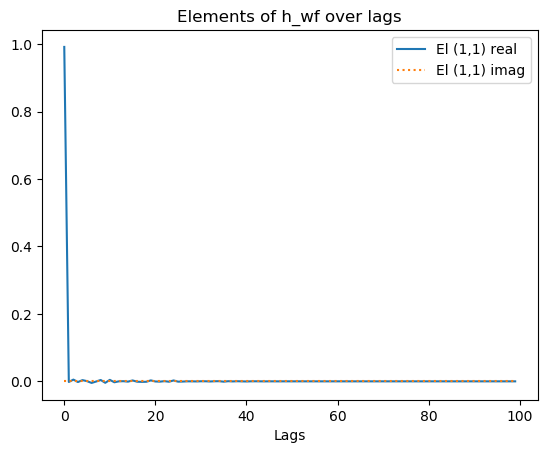

PyObject Text(0.5, 1, 'Elements of h_wf over lags')

In [8]:
plot_WF(h_wf, rl = false)

### Poles of Wiener Filter

## Analyze One step prediction error

In [9]:
X_hat = one_step_pred(X_sig, h_wf, pred)

1×90000 Array{Complex{Float64},2}:
 -0.534909+0.0im  -0.475822+0.0im  …  -0.817899+0.0im  -0.783318+0.0im

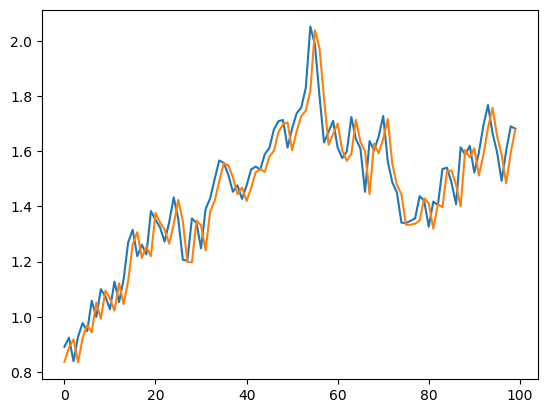

C:\Users\JaredMcBride\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003DB8AA08>
 PyObject <matplotlib.lines.Line2D object at 0x000000004E946688>

In [10]:
wind = (1:100) .+ 24000
plot([X_sig[1,wind] X_hat[1,wind]])

In [11]:
X_err = X_sig - X_hat

1×90000 Array{Complex{Float64},2}:
 0.0-0.0im  0.0-0.0im  0.0-0.0im  …  0.0309909-0.0im  -0.0587131-0.0im

In [12]:
C = my_crosscov(pred[:],X_err[:],-100:10)

111-element Array{Complex{Float64},1}:
   -9.365661215672569e-5 - 1.400994361422496e-19im
   -8.301565936040139e-5 - 1.456943839196329e-19im
 -0.00011036279635978282 - 3.4347713937481335e-19im
    -7.61101625997242e-5 - 3.1573192551668655e-19im
    -6.46101444329178e-5 - 1.8625829667830705e-19im
   -3.623213381157662e-5 - 3.1528336501841075e-19im
  -1.9191707459410962e-5 + 2.7948943474512264e-19im
    1.416815222234178e-5 + 1.6461849997307829e-19im
  -1.8221269167082622e-5 + 3.389258279177842e-19im
    7.448859184645878e-6 + 3.0431268302998767e-19im
    1.132244661113805e-5 + 1.3004117472826411e-19im
   -8.712880847700814e-7 + 1.295368025148939e-19im
     -2.0542559767095e-5 + 1.3396719827477693e-19im
                         ⋮
   2.2555583709965037e-5 - 5.548190443157493e-20im
   1.2452838934315182e-5 - 5.604502480436064e-19im
    0.009999915091045367 + 2.4447159620426495e-21im
    0.009909298120543367 + 7.029809411466745e-19im
    0.009802543232441547 + 2.788745498109456e-19im
    0.

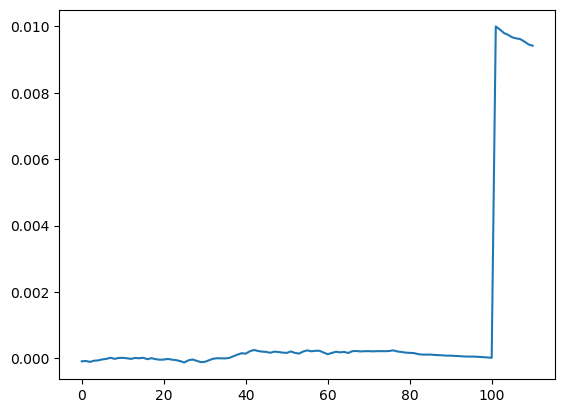

C:\Users\JaredMcBride\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000004EAE66C8>

In [13]:
plot(C)

## Analyze Reduced Model Run

In [14]:
X_rm = redmodrun(X, h_wf, Psi)


reduced model did not blowup
